In [28]:
%cd /home/q123/Desktop/explo

import torch 
import gpytorch 
import logging
import logging.config

from src.helpers import setup_experiment
from src.gibo.optim import GIBOptimizer
from src.optim import BOptimizer
from src.config import get_configs

logging.config.fileConfig('logging.conf')
# create root logger
logger = logging.getLogger()

/home/q123/Desktop/explo


In [29]:
from src.tester import Tester 

#env_name = "Swimmer-v2"
env_name = "CartPole-v1"
kernel_name = "linearstate"
kernel_name2 = "rbf"
delta = 1e-2
n_train =50
n_test = 100
n_episodes = 5 ### number of runs for test episodes / for train = 1

In [30]:
env_config,likelihood_config,kernel_config,_,_ = get_configs(env_name,kernel_name)
additional_layers=[4]
model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)
tester = Tester(model,objective_env,
                 local_opt ="/home/q123/Desktop/explo/local_optima/CartPole-v1_[4, 4, 1]",
                 use_opt_states = True,
                 delta =delta,
                 n_train=n_train,n_test=n_test,n_episodes=n_episodes)

#### generate data for all experiments
train_data,test_data,opt_states = tester.generate_data()

MathLog.src.helpers : WARNING : MLP dimensions : [4, 4, 1]
Using ard_num_dims = 25
local_y 0.9999942183494568 local_opt tensor([-0.1238,  0.0230, -0.1873, -0.4381, -0.0541,  0.0396,  0.1156,  0.2574,
        -0.0377, -0.0358])
 intial local opt reward : 0.9999942183494568
Generating data
Done generating data


##############################
covar_lengthscale max 0.0019960079807788134 / min 0.0019960079807788134
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
##############################
covar_lengthscale max 0.0016381775494664907 / min -0.0008705821237526834
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])


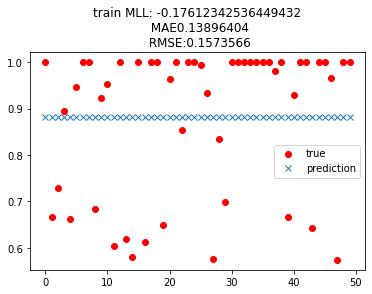

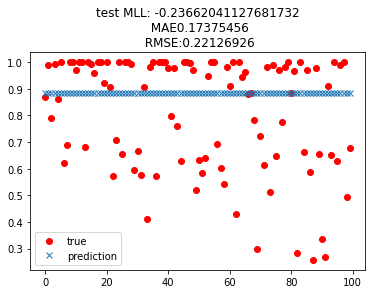

In [31]:
train_data,train_pred,test_data,test_pred,opt_data = tester.run(train_data,test_data,opt_states)

MathLog.src.helpers : WARNING : MLP dimensions : [4, 4, 1]
Using ard_num_dims = 25
local_y 0.9999942183494568 local_opt tensor([-0.1238,  0.0230, -0.1873, -0.4381, -0.0541,  0.0396,  0.1156,  0.2574,
        -0.0377, -0.0358])
 intial local opt reward : 0.9999942183494568
##############################
covar_lengthscale max 0.5 / min 0.5                      covar_outputscale 1.9999998807907104                     noise 0.30000001192092896
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
##############################
covar_lengthscale max 0.33346259593963623 / min 0.3333333134651184                      covar_outputscale 0.010000022128224373                     noise 0.20000000298023224
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])


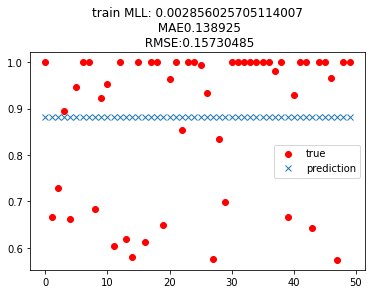

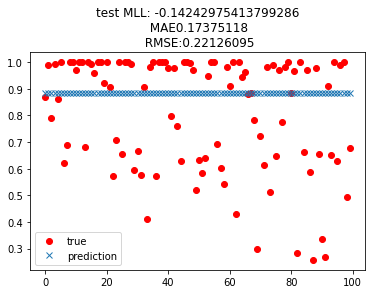

In [32]:
env_config,likelihood_config,kernel_config,_,_ = get_configs(env_name,kernel_name2)
additional_layers=[4]
model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)
tester = Tester(model,objective_env,
                 local_opt ="/home/q123/Desktop/explo/local_optima/CartPole-v1_[4, 4, 1]",
                 use_opt_states = True,
                 delta =delta,
                 n_train=n_train,n_test=n_test,n_episodes=n_episodes)

train_data,train_pred,test_data,test_pred,opt_data = tester.run(train_data,test_data,opt_states)

In [12]:
from sklearn.linear_model import ARDRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


train_x,train_y,train_s = train_data
test_x,test_y,test_s = test_data
local_opt,opt_states = opt_data

Phi_train = tester.model.mlp(train_x,opt_states).flatten(start_dim=1)
Phi_test = tester.model.mlp(test_x,opt_states).flatten(start_dim=1)
Y_train,Y_test = train_y,test_y

ard = make_pipeline(StandardScaler(),
                    ARDRegression(compute_score=True, n_iter=20))

ard.fit(Phi_train, Y_train)

Y_train_pred = ard.predict(Phi_train)
Y_test_pred = ard.predict(Phi_test)

def plot(x,best_x,y,y_hat):
    
    print(x.shape,best_x.shape)
    dist = torch.linalg.norm(x-best_x,dim=1)
    idx = torch.argsort(dist)
    y = y[idx]
    y_hat = y_hat[idx]
    x_plot = range(len(y))
    plt.scatter(x_plot,y,label="true",color="red")
    plt.errorbar(x_plot,y_hat,label="prediction",fmt="x")
    plt.title("MAE:"+str(mae(y,y_hat)) +"/ RMSE :"+str(mse(y,y_hat,squared=False)))


torch.Size([50, 25]) torch.Size([25])


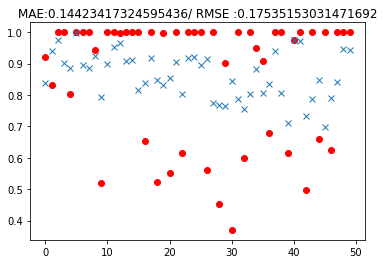

In [13]:
plot(train_x,local_opt.squeeze(),Y_train,Y_train_pred)

torch.Size([100, 25]) torch.Size([25])


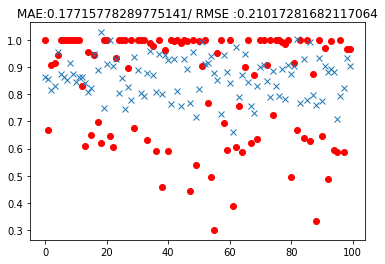

In [14]:
plot(test_x,local_opt.squeeze(),Y_test,Y_test_pred)

In [107]:
# Importing modules that are required
 
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

sigma2  = 0.1
n_points = Phi_train.shape[0]
n_feats = Phi_train.shape[1]
Phi = Phi_train.numpy()
Y = Y_train.numpy()

X_scaler = StandardScaler()
Y_scaler = StandardScaler()
alpha = 1/ (2*n_points) ## sklearn weights the l2 norm
regressor = LassoLars(alpha=alpha,fit_intercept=False,normalize=True)

###
Theta = Phi
m,n = Phi.shape

def get_sigma_y(gamma,Phi):
    
    Gamma = np.diag(gamma)
    
    sigma_y = sigma2  * np.eye(n_points) + Phi @ Gamma @ Phi.T
    
    return sigma_y



gamma_k = np.ones(n_feats)

for i in range(1000):
    
    Sigma_y = get_sigma_y(gamma_k,Phi)
    Sigma_y_inv = np.linalg.inv(Sigma_y)
    c_k = np.diag(Phi.T @ Sigma_y_inv @ Phi )
    assert np.all(c_k>=0)
    ######################################################""
    ######################################################""
    
    mu_k = 2* sigma2 * (c_k ** 0.5)
    Phi_tmp = Phi @ np.diag(mu_k**-1)
    
    ### Normalize entries to the regressor
      
    #Phi_std = np.std(Phi_tmp, axis=0)
    Phi_std = np.ones(Phi_tmp.shape[1])
    Phi_tmp = Phi_tmp / Phi_std
    
    # Y_std = np.std(Y, axis=0)
    # Y_tmp = Y / Y_std 
    Y_tmp = Y
    
    
    ######################################
    
    
    regressor.fit(Phi_tmp, Y_tmp)
    zeta_k =  regressor.coef_ / Phi_std
    xi_k = np.diag(mu_k**-1) @ zeta_k
    
    gamma_old = gamma_k.copy()
    gamma_k = (c_k ** -0.5)* np.abs(xi_k)
    assert np.all(gamma_k>=0)
  
    if i % 100 == 0 :
    
        Post_m = np.diag(gamma_k) @ Phi.T @ np.linalg.inv(Sigma_y) @ Y
        #Y_pred = (Phi @ Post_m + mean) * std
        Y_pred = (Phi @ Post_m)
        print("MAE",np.mean(np.abs(Y_pred-Y)))
    
    if i > 10 and np.linalg.norm(gamma_k-gamma_old, np.inf) <= 1e-5: break
    
 

Sigma_y = get_sigma_y(gamma_k,Phi)
Post_m = np.diag(gamma_k) @ Phi.T @ np.linalg.inv(Sigma_y) @ Y
Y_pred = Phi @ Post_m
np.mean(np.abs(Y_pred-Y))



# # Splitting training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                      test_size = 0.15, random_state = 42)
 
# # Creating and fitting the regressor
# regressor = LassoLars(alpha = 1)
# regressor.fit(X_train, y_train)
 
 
# # Evaluating model
# prediction = regressor.predict(X_test)
 
# print(f"r2 Score of test set : {r2_score(y_test, prediction)}")

MAE 0.6819116297181814
MAE 0.15578289284352867
MAE 0.15559204311910482
MAE 0.15554619360180405
MAE 0.15553527028525552
MAE 0.15553267281226305
MAE 0.15553205543000975
MAE 0.1555319087025469


0.1555318748700703

In [ ]:
    Sigma_y_inv_Theta = np.linalg.solve(Sigma_y, Theta)
    c = np.array([np.inner(Theta[:,j].T, Sigma_y_inv_Theta[:,j]) for j in range(n)])
    
    assert np.all(c-c_k<1e-5)
    
      
    
    Phi_tmp2 = Phi @ (np.diag(c**-0.5))/ (2*sigma)
    regressor.fit(Phi_tmp2, Y_train)
    zeta = regressor.coef_
    
    
    print(zeta_k.max(),zeta_k.mean(),zeta_k.min())
    
    assert np.all(np.abs(zeta-zeta_k)<1e-5)  
    
    